## importing libraries

In [1]:
import numpy as np
import pandas as pd 

## load the Dataset

In [2]:
rawdata=pd.read_csv("labeled_data.csv")

In [3]:
rawdata.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


We can see that there isn't any NULL entry.So, we preoceed to next step

In [5]:
rawdata['Describe']=rawdata['class'].map({0:"hate_speech",1:"offensive_language",2:"neither"})

In [41]:
rawdata.head(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,Describe
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,neither
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_language


In [7]:
rawdata['Describe'].value_counts()

Describe
offensive_language    19190
neither                4163
hate_speech            1430
Name: count, dtype: int64

In [8]:
data=rawdata[['tweet','Describe']]
data.head()

,tweet,Describe
0,!!! RT @mayasolovely: As a woman you shouldn't...,neither
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_language


In [9]:
#importing regular expression module and natural laguage toolkit

import re 
import nltk
import string

In [11]:
#importing stop woords
#for downloading stop words use 'nltk.download(stopwords)' 

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

#stopwords are widely used words like i,myself,the,...

stopwords=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# import stemming

#Stemming is the process of producing morphological variants of a root/base word.
# example-> "likes" ,"liked","likely","liking" are converted into "like"

stemmer=nltk.SnowballStemmer("english")

In [13]:
#data cleaning function

#sub() function belongs to the Regular Expressions ( re ) module in Python.
#It returns a string where all matching occurrences of the specified pattern are replaced by the replace string.

def clean_data(text):
    text=str(text).lower()
    text=re.sub('https?//\s+\www\.s+','',text) # replacing with blank
    text=re.sub('\n','',text)
    text=re.sub('\[.*?\]','',text)
    text=re.sub('<.*?>','',text)
    text=re.sub('\w*\d\w','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    
    #stopwords removal
    text=[word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text) 
    
    #stemmings the text
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [14]:
#cleaning tweets using clean_data func

data['tweet']=data['tweet'].apply(clean_data)

C:\Users\USER\AppData\Local\Temp\ipykernel_984\2918800300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet']=data['tweet'].apply(clean_data)


In [15]:
data.head()

,tweet,Describe
0,rt mayasolov woman shouldnt complain clean ho...,neither
1,rt boy dat coldtyga dwn bad cuffin dat hoe p...,offensive_language
2,rt urkindofbrand dawg rt ife ever fuck bitch ...,offensive_language
3,rt cganderson vivabas look like tranni,offensive_language
4,rt shenikarobert shit hear might true might f...,offensive_language


In [16]:
#creating nparray

In [17]:
x=np.array(data['tweet'])
y=np.array(data['Describe'])

In [18]:
x,y

(array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
        ' rt  boy dat coldtyga dwn bad cuffin dat hoe place',
        ' rt urkindofbrand dawg rt ife ever fuck bitch start cri confus shit',
        ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
        'youu got wild bitch tellin lie',
        'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll httptcoyebvnzb'],
       dtype=object),
 array(['neither', 'offensive_language', 'offensive_language', ...,
        'offensive_language', 'offensive_language', 'neither'],
       dtype=object))

In [19]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split

In [20]:
cv=CountVectorizer()
x=cv.fit_transform(x)

In [21]:
x

<24783x30006 sparse matrix of type '<class 'numpy.int64'>'
	with 206666 stored elements in Compressed Sparse Row format>

In [22]:
#spliting the dataset into train and test dtasets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.16,random_state=30)

In [23]:
x_train

<20817x30006 sparse matrix of type '<class 'numpy.int64'>'
	with 173501 stored elements in Compressed Sparse Row format>

In [24]:
#building ot the ML model

from sklearn.tree import DecisionTreeClassifier 

In [25]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
y_pred=dt.predict(x_test)
y_pred

array(['neither', 'offensive_language', 'offensive_language', ...,
       'offensive_language', 'neither', 'neither'], dtype=object)

In [27]:
#confusion matrix

from sklearn.metrics import confusion_matrix as mat
cm=mat(y_test,y_pred)
cm

array([[  79,   28,  131],
       [  15,  548,  100],
       [ 120,   97, 2848]], dtype=int64)

In [28]:
#for Better visualization using the heatmap

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: >

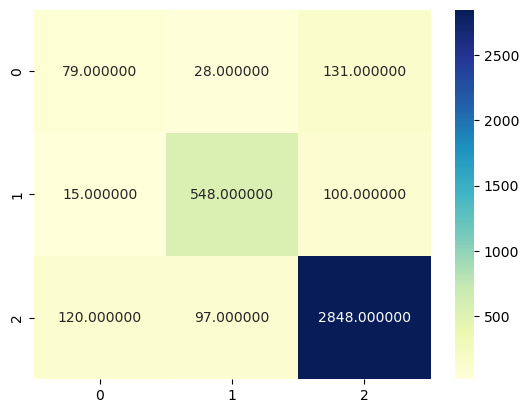

In [29]:
sns.heatmap(cm,annot=True,fmt="f",cmap="YlGnBu")

we can see that the diagonal elements are prety darker than other elements.so,its good 

## calculating model Accuracy

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8761976802824004

## Testing the model with some tweets

### Sample 1

In [31]:
sample="All I wanna do is get money and fuck model bitches!- Russell Simmons" 
sample=clean_data(sample)

In [32]:
sample

'wanna get money fuck model bitch russel simmon'

In [33]:
data1=cv.transform([sample]).toarray()

In [34]:
data1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
dt.predict(data1)

array(['offensive_language'], dtype=object)

### Sample 2

In [36]:
sample_2="@CB_Baby24: @white_thunduh alsarabsss"" hes a beaner smh you can tell hes a mexican" 
sample_2=clean_data(sample_2)

In [37]:
sample_2

' whitethunduh alsarabsss hes beaner smh tell hes mexican'

In [38]:
data2=cv.transform([sample_2]).toarray()

In [39]:
data2

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
dt.predict(data2)

array(['hate_speech'], dtype=object)